# Problem Statement

In this project, we will apply unsupervised learning techniques on product spending data collected for customers of a wholesale distributor in Lisbon, Portugal to identify customer segments hidden in the data. 

# Identifying Customer Segments 

In this project, I analyzed a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features 'Channel' and 'Region' will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import visuals as vs

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

In [2]:
# Load the wholesale customers dataset
try:
    data = pd.read_csv('dataset/customers.csv')
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print ("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


# Data Exploration
We will begin exploring the data through visualizations to understand how each feature is related to the others and observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which we will track through the course of this project.

The dataset is composed of six important product categories: **'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicatessen'.** 

Description of Categories

- **FRESH**: annual spending (m.u.) on fresh products (Continuous)
- **MILK**: annual spending (m.u.) on milk products (Continuous)
- **GROCERY**: annual spending (m.u.) on grocery products (Continuous)
- **FROZEN: annual** spending (m.u.)on frozen products (Continuous)
- **DETERGENTS_PAPER**: annual spending (m.u.) on detergents and paper products (Continuous)
- **DELICATESSEN**: annual spending (m.u.) on and delicatessen products (Continuous)


In [3]:
# Display a description of the dataset
stats = data.describe()
stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Selecting Samples

To get a better understanding of the customers and how their data will transform through the analysis, we would select a few sample data points and explore them in more detail. 

In [4]:
# Using data.loc to filter a pandas DataFrame
data.loc[[100, 200, 300],:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
100,11594,7779,12144,3252,8035,3029
200,3067,13240,23127,3941,9959,731
300,16448,6243,6360,824,2662,2005


In [5]:
# Retrieve column names
# data.keys()

data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

Logic in selecting the 3 samples: Quartiles

- As we can previously (in the object "stats"), we've the data showing the first and third quartiles.
- We can filter samples that are starkly different based on the quartiles.
- This way we've two establishments that belong in the first and third quartiles respectively in, for example, the Frozen category.

In [6]:
# Fresh filter
fresh_limit = 3127.750000
display(data.loc[data.Fresh < fresh_limit, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
16,1020,8816,12121,134,4508,1080
31,2612,4339,3133,2088,820,985
34,1502,1979,2262,425,483,395
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72


In [7]:
# Frozen filter
frozen_limit = 742.250000
display(data.loc[data.Frozen < frozen_limit, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
8,5963,3648,6192,425,1716,750
12,31714,12319,11757,287,3881,2931


In [8]:
# Frozen
frozen_limit = 3554.250000
display(data.loc[data.Frozen > frozen_limit, :].head(7))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
10,3366,5403,12974,4400,5977,1744
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
33,29729,4786,7326,6130,361,1083
39,56159,555,902,10002,212,2916


Hence we'll be choosing:

- 43: Very low "Fresh" and very high "Grocery"
- 12: Very low "Frozen" and very high "Fresh"
- 39: Very high "Frozen" and very low "Detergens_Paper"

In [9]:
# Select three indices of the choice we wish to sample from the dataset
indices = [43, 12, 39]

# Create a DataFrame of the chosen samples
# .reset_index(drop = True) resets the index from 0, 1 and 2 instead of 100, 200 and 300 
samples = pd.DataFrame(data.loc[indices], columns = data.columns).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


### Comparisions of sample and means

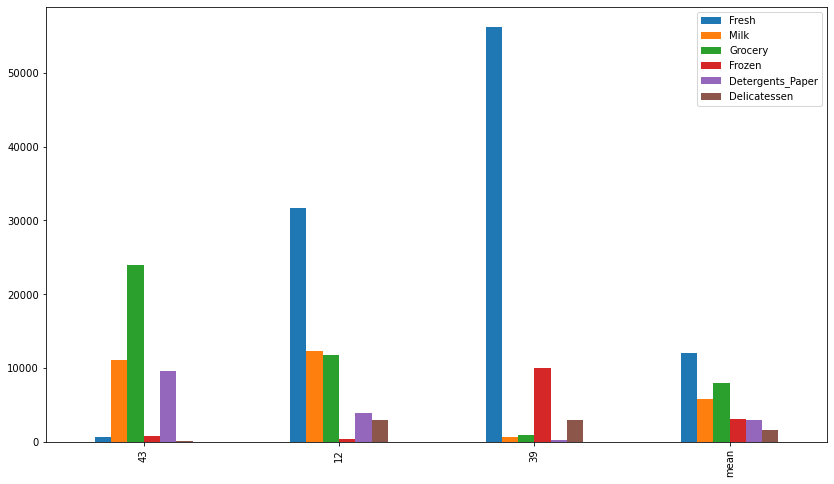

In [10]:
# Import Seaborn, a very powerful library for Data Visualisation
import seaborn as sns

# Get the means 
mean_data = data.describe().loc['mean', :]

# Append means to the samples' data
samples_bar = samples.append(mean_data)

# Construct indices
samples_bar.index = indices + ['mean']

# Plot bar plot
samples_bar.plot(kind='bar', figsize=(14,8))

### Comparing Samples' Percentiles

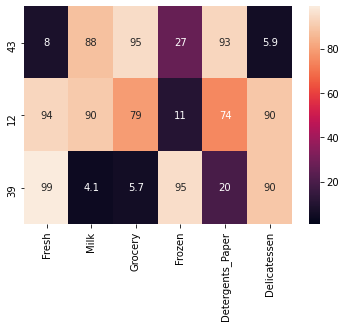

In [11]:
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)

# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Select the indices we chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map using the seaborn library
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

Consider the total purchase cost of each product category and the statistical description of the dataset above for pur sample customers. The establishment (customer) could each of the three samples we've chosen represent

- **Index 0: Coffee Cafe**
    - Low spending on "Fresh", "Frozen" and "Delicatessen".
    - Majority of spending on "Grocery", "Milk" and "Detergents_Paper".
    - With some spending on "Delicatessen", it may be a cafe establishment serving drinks, coffee perhaps, with some ready-made food as a complimentary product.
- **Index 1: Upscale Restaurant**
    - Low spending on "Frozen".
    - Majority of spending is a mix of "Fresh", "Milk, and "Grocery"
    - This may be an upscale restaurent with almost no spending on frozen foods.
    - Most upscale restaurants only use fresh foods.
- **Index 2: Fresh Food Retailer**
    - Majority of spending is on "Fresh" goods with little spending on everything else except on "Frozen".
    - This may be a grocery store specializing in fresh foods with some frozen goods.

#  Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. 

That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.


In [12]:
# Existing features
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [13]:
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Create list to loop through
dep_vars = list(data.columns)


# Creating loop to test each feature as a dependent variable
for var in dep_vars:

    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([var], axis = 1)
    # Confirm drop
    # display(new_data.head(2))

    # Create feature Series (Vector)
    new_feature = pd.DataFrame(data.loc[:, var])
    # Confirm creation of new feature
    # display(new_feature.head(2))

    #  Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

    # Create a decision tree regressor and fit it to the training set
    # Instantiate
    dtr = DecisionTreeRegressor(random_state=42)
    # Fit
    dtr.fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    # Returns R^2 score
    score = dtr.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(var, score))

R2 score for Fresh as dependent variable: -0.3857497102040739
R2 score for Milk as dependent variable: 0.15627539501732113
R2 score for Grocery as dependent variable: 0.6818840085440834
R2 score for Frozen as dependent variable: -0.21013589012491396
R2 score for Detergents_Paper as dependent variable: 0.27166698062685013
R2 score for Delicatessen as dependent variable: -2.254711537203931


- R2 score for “Fresh”, “Frozen” and “Delicatessen” is negative. This implies that they are necessary to identify customers’ behaviour since they are independent and no other feature can explain the variation in them.

- R2 score for “Milk” and “Detergents_Paper” is positive but the values are way too small, making them necessary for customers’ behaviour.

- R2 score for “Grocery” is positive and much more than other values. Hence, other features can explain the variation in “Grocery”

# Visualize Feature Distributions

To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F96EA8B00>,
      dtype=object)

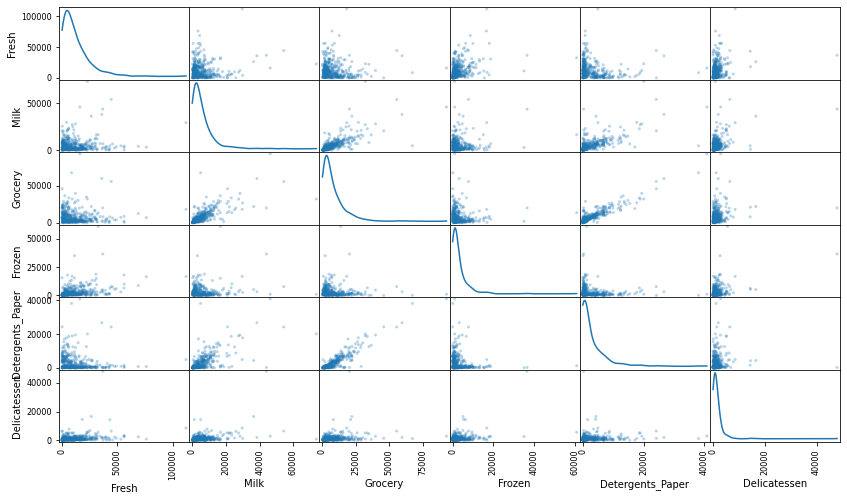

In [14]:
from pandas.plotting import scatter_matrix
# Produce a scatter matrix for each pair of features in the data
scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

#### Correlation Matrix

- This is to cross-reference with the scatter matrix above to draw more accurate insights from the data.
- The higher the color is on the bar, the higher the correlation.
- The following pairs show correlation(linear trend) :
    - Grocery and Detergents_Paper.
    - Grocery and Milk.
    - Milk and Detergents_Paper.
- Since, Grocery correlates with milk and Detergents_Paper, it confirms our suspicion.
- The data is not normally distributed. Most of the points lie towards the left.

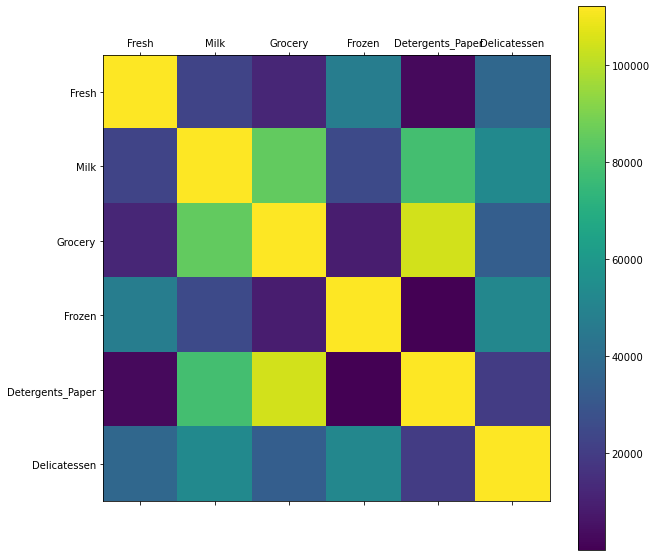

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);


plot_corr(data)

# Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results we obtained from the analysis are significant and meaningful.

## Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.


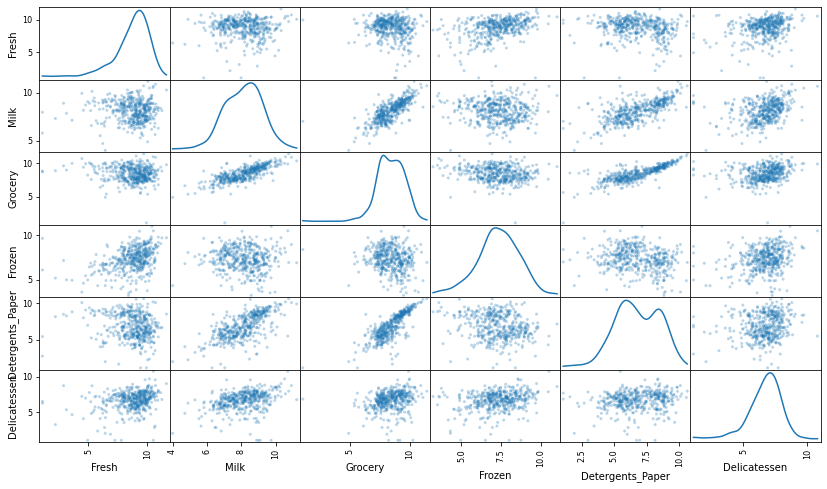

In [16]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features we may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).


In [40]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
1,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
2,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968


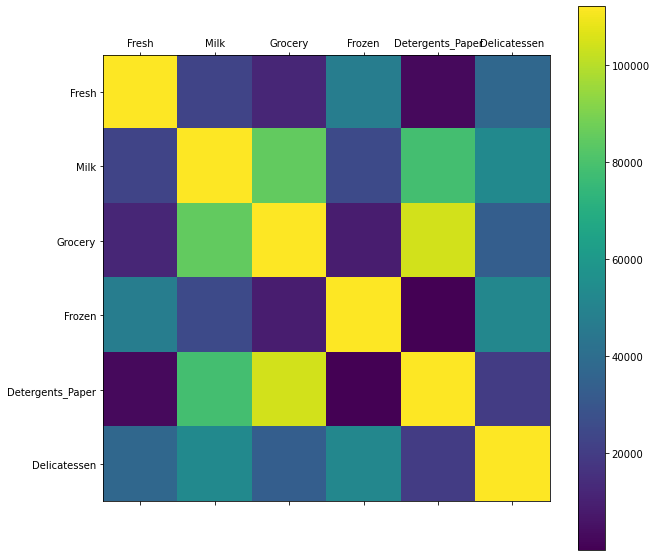

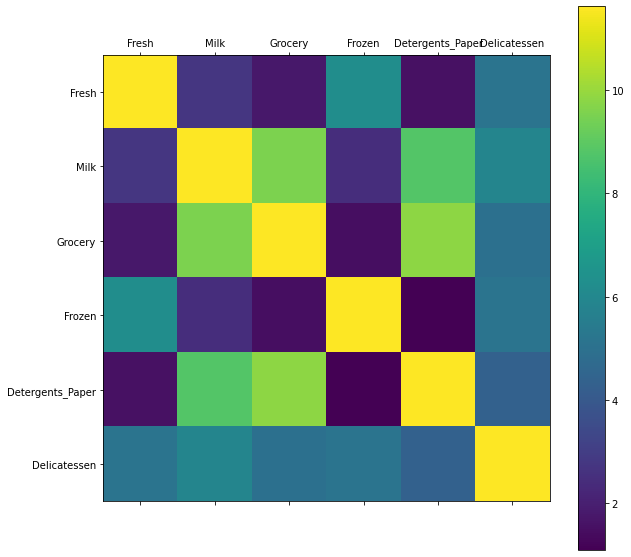

In [18]:
plot_corr(data)
plot_corr(log_data)

#### Changes in correlations

- Grocery and Detergents_Paper has a weaker correlation.
- Grocery and Milk has a slightly stronger correlation.
- Detergents_Paper and Milk has a slightly stronger correlation.

## Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [19]:
# This is how np.percentile would work
# np.percentile[series, percentile]
np.percentile(data.loc[:, 'Milk'], 25)

1533.0

In [20]:
import itertools

# Select the indices for data points we wish to remove
outliers_lst  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.columns:
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data.loc[:, feature], 25)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data.loc[:, feature], 75)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)

    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))

    # The tilde sign ~ means not
    # So here, we're finding any points outside of Q1 - step and Q3 + step
    outliers_rows = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), :]
    # display(outliers_rows)

    outliers_lst.append(list(outliers_rows.index))

outliers = list(itertools.chain.from_iterable(outliers_lst))

# List of unique outliers
# We use set()
# Sets are lists with no duplicate entries
uniq_outliers = list(set(outliers))

# List of duplicate outliers
dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))

print ('Outliers list:\n', uniq_outliers)
print ('Length of outliers list:\n', len(uniq_outliers))

print ('Duplicate list:\n', dup_outliers)
print ('Length of duplicates list:\n', len(dup_outliers))

# Remove duplicate outliers
# Only 5 specified
good_data = log_data.drop(log_data.index[dup_outliers]).reset_index(drop = True)

# Original Data 
print ('Original shape of data:\n', data.shape)
# Processed Data
print ('New shape of data:\n', good_data.shape)

Data points considered outliers for the feature 'Fresh':
Data points considered outliers for the feature 'Milk':
Data points considered outliers for the feature 'Grocery':
Data points considered outliers for the feature 'Frozen':
Data points considered outliers for the feature 'Detergents_Paper':
Data points considered outliers for the feature 'Delicatessen':
Outliers list:
 [128, 264, 137, 142, 145, 154, 412, 285, 161, 289, 420, 38, 171, 429, 175, 304, 305, 439, 183, 57, 184, 187, 65, 66, 193, 325, 75, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109]
Length of outliers list:
 42
Duplicate list:
 [128, 65, 66, 75, 154]
Length of duplicates list:
 5
Original shape of data:
 (440, 6)
New shape of data:
 (435, 6)


# Feature Transformation

In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

## PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.


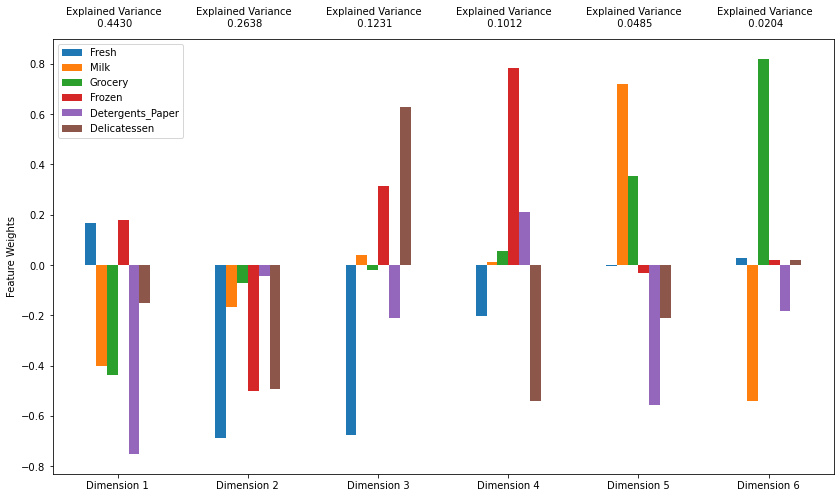

In [21]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
# Instantiate
pca = PCA(n_components=6)
# Fit
pca.fit(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [22]:
# DataFrame of results
display(pca_results)

# DataFrame
display(type(pca_results))

# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


pandas.core.frame.DataFrame

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points.

In [23]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-3.1072,2.7017,-0.6386,1.8708,0.6452,0.1333
1,-2.2406,-1.2419,-1.0729,-1.9589,0.2160,-0.1782
2,3.0426,-2.5854,0.1965,-0.0757,-1.4213,0.0093


## Dimensionality Reduction

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. 



In [24]:
# Apply PCA by fitting the good data with only two dimensions
# Instantiate
pca = PCA(n_components=2)
pca.fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [25]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-3.1072,2.7017
1,-2.2406,-1.2419
2,3.0426,-2.5854


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case Dimension 1 and Dimension 2). 

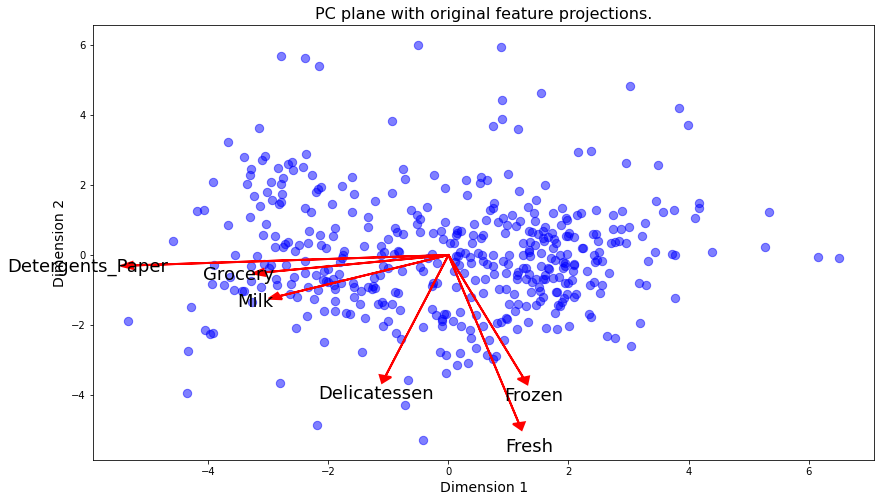

In [26]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation
Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on 'Milk', 'Grocery' and 'Detergents_Paper', but not so much on the other product categories.


# Clustering
In this section, we will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. We will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale.

##  Creating Clusters
Depending on the problem, the number of clusters that we expect to be in the data may already be known. When the number of clusters is not known a priori, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster **from -1 (dissimilar) to 1 (similar)**. 

Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.

In [27]:
# Imports
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [28]:
# Create range of clusters 
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


#### GMM Implementation

In [29]:
for n_clusters in range_n_clusters:
    # Applying the clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_clusters).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.37598604546578696
For n_clusters = 3. The average silhouette_score is : 0.342254608880423
For n_clusters = 4. The average silhouette_score is : 0.3187871650427711
For n_clusters = 5. The average silhouette_score is : 0.20766603868611602
For n_clusters = 6. The average silhouette_score is : 0.3063903905588759
For n_clusters = 7. The average silhouette_score is : 0.31638597985804195
For n_clusters = 8. The average silhouette_score is : 0.3163633706860085
For n_clusters = 9. The average silhouette_score is : 0.3092478077228237
For n_clusters = 10. The average silhouette_score is : 0.25803069055126343


#### KNN Implementation

In [30]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # Applying clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.cluster_centers_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.42628101546910846
For n_clusters = 3. The average silhouette_score is : 0.3971382088445873
For n_clusters = 4. The average silhouette_score is : 0.3313522731210069
For n_clusters = 5. The average silhouette_score is : 0.3523711701608961
For n_clusters = 6. The average silhouette_score is : 0.36248851086278977
For n_clusters = 7. The average silhouette_score is : 0.35786081485093085
For n_clusters = 8. The average silhouette_score is : 0.36405497488401767
For n_clusters = 9. The average silhouette_score is : 0.3589824539081356
For n_clusters = 10. The average silhouette_score is : 0.3522324618668062


### Distance Metric

The Silhouette Coefficient is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample. Therefore, it makes sense to use the same distance metric here as the one used in the clustering algorithm. This is Euclidean for KMeans and Mahalanobis for general GMM.

### Metric for GMM

BIC could sometimes be a better criterion for deciding on the optimal number of clusters.

The best score is obtained when the number of clusters is 2. Similarly, when we use KMeans, the best score is also obtained with the same number of clusters.

# Cluster Visualization
Once we've chosen the optimal number of clusters for the clustering algorithm using the scoring metric above, we can now visualize the results by executing the code block below. For experimentation purposes, we are welcome to adjust the number of clusters for the clustering algorithm to see various visualizations. 

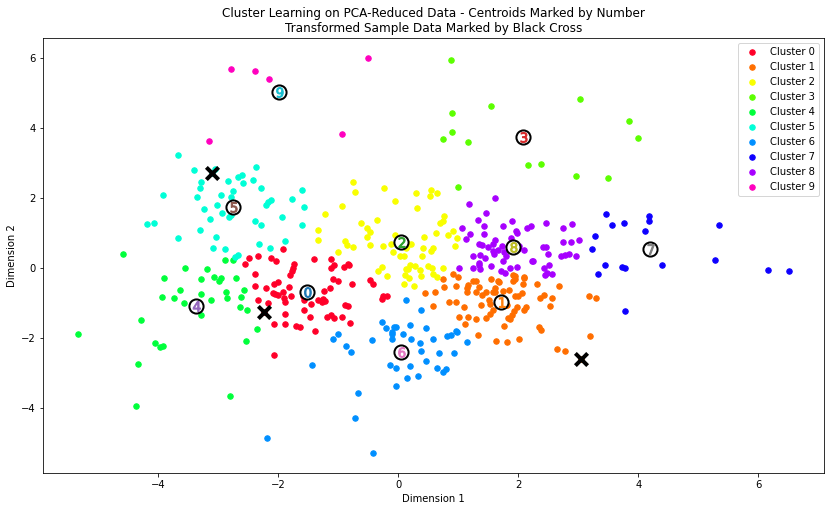

In [31]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [32]:
# Extra code because we ran a loop on top and this resets to what we want
clusterer = GaussianMixture(n_components=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

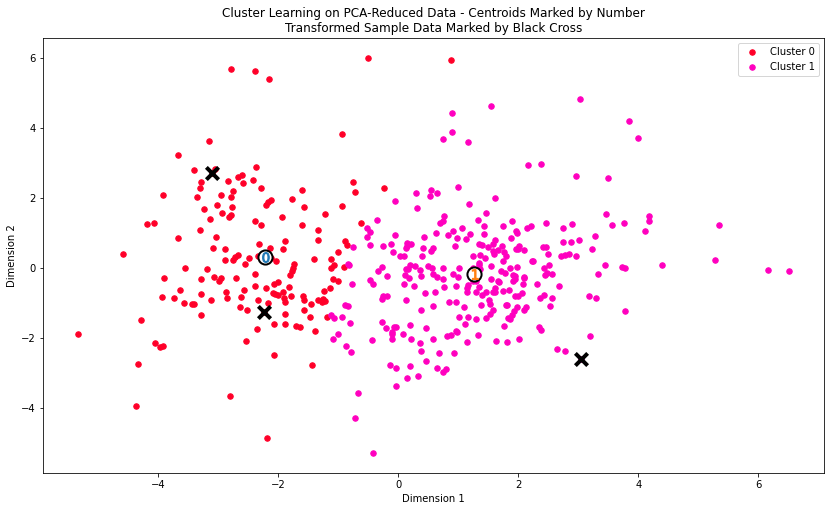

In [33]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

##  Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.


In [34]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.columns)
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3567.0,7860.0,12249.0,873.0,4713.0,966.0
Segment 1,8939.0,2108.0,2758.0,2073.0,352.0,730.0


In [35]:
# Clusters' deviation from median
display(true_centers - data.median())

# Clusters' deviation from mean
display(true_centers - data.mean())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-4937.0,4233.0,7493.5,-653.0,3896.5,0.5
Segment 1,435.0,-1519.0,-1997.5,547.0,-464.5,-235.5


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-8433.297727,2063.734091,4297.722727,-2198.931818,1831.506818,-558.870455
Segment 1,-3061.297727,-3688.265909,-5193.277273,-998.931818,-2529.493182,-794.870455


In [36]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [37]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


# Conclusion
In this final section, we will investigate ways that can make use of the clustered data. First, we will consider how the different groups of customers, the customer segments, may be affected differently by a specific delivery scheme. Next, we will consider how giving a label to each customer (which segment that customer belongs to) can provide for additional features about the customer data. Finally, we will compare the customer segments to a hidden variable present in the data, to see whether the clustering identified certain relationships.

## Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the 'Channel' and 'Region' features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the 'Channel' feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.


In [38]:
dup_outliers

[128, 65, 66, 75, 154]

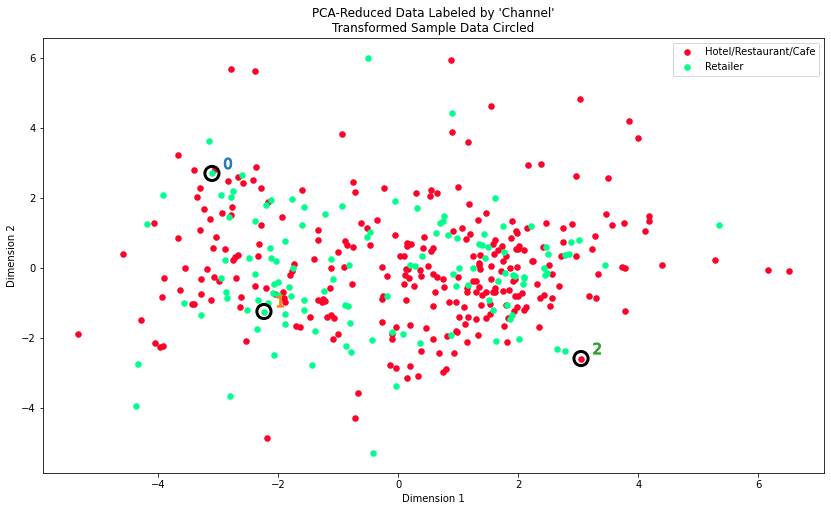

In [39]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

## Achievement
- applied preprocessing techniques such as feature scaling and outlier detection.
- interpreted data points that have been scaled, transformed, or reduced from PCA.
- analyzed PCA dimensions and construct a new feature space.
- optimally clustered a set of data to find hidden patterns in a dataset.
- assessed information given by cluster data and use it in a meaningful way.